# Model Stacking

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier

from sklearn.model_selection import GridSearchCV, KFold
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.feature_selection import RFE

# from sklearn.model_selection import cross_val_score, cross_val_predict
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# from sklearn.metrics import classification_report, roc_curve, auc
# from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

## Load Split Data

In [2]:
clean_train = "clean_train.csv"
clean_val = "clean_val.csv"
clean_test = "clean_test.csv"
train_subsam = "train_subsam.csv"
train_smote = "train_smote.csv"

rnd_stack = 44
num_cols = ["Term","NoEmp","SecuredSBA","GrDisburs","GrApprov","ApprovSBA"]
target = "Default"

In [3]:
df_train = pd.read_csv(clean_train, low_memory=False)
df_val = pd.read_csv(clean_val, low_memory=False)
df_test = pd.read_csv(clean_test, low_memory=False)

df_under = pd.read_csv(train_subsam, low_memory=False)
df_smote = pd.read_csv(train_smote, low_memory=False)

In [4]:
X_train = df_train.drop(columns=[target])
X_val = df_val.drop(columns=[target])
X_test = df_test.drop(columns=[target])
X_under = df_under.drop(columns=target)
X_smote = df_smote.drop(columns=target)

y_train = df_train[target]
y_val = df_val[target]
y_test = df_test[target]
y_under = df_under[target]
y_smote = df_smote[target]

In [5]:
print(f"Train: {X_train.shape}, {y_train.shape}")
print(f"Val:   {X_val.shape}, {y_val.shape}")
print(f"Test:  {X_test.shape}, {y_test.shape}\n")

print(f"SubSam: {X_under.shape}, {y_under.shape}")
print(f"SMOTE:  {X_smote.shape}, {y_smote.shape}")

Train: (626670, 18), (626670,)
Val:   (134552, 18), (134552,)
Test:  (134498, 18), (134498,)

SubSam: (219654, 18), (219654,)
SMOTE:  (1033686, 18), (1033686,)


## Model Training

### Model Tuning

**Base Models and Meta-Model**

In [6]:
models = [
    ("dtc", DecisionTreeClassifier(criterion="entropy", max_depth=20, random_state=rnd_stack)),
    ("rfc", RandomForestClassifier(criterion="entropy", max_depth=20, random_state=rnd_stack)),
    ("xgb", XGBClassifier(learning_rate=0.2, max_depth=10, random_state=rnd_stack))
]

In [7]:
meta_model = LogisticRegression(C=1, penalty="l2", random_state=rnd_stack, max_iter=1000)

In [8]:
stacked_model = StackingClassifier(estimators=models, final_estimator=meta_model)

stacked_model.fit(X_train, y_train)

StackingClassifier(estimators=[('dtc',
                                DecisionTreeClassifier(criterion='entropy',
                                                       max_depth=20,
                                                       random_state=44)),
                               ('rfc',
                                RandomForestClassifier(criterion='entropy',
                                                       max_depth=20,
                                                       random_state=44)),
                               ('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stoppin...
                                              learning_rate=0.2, max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None, max_depth=10,
                                              max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=None, n_jobs=None,
                                              num_parallel_tree=None,
                                              random_state=44, ...))],
                   final_estimator=LogisticRegression(C=1, max_iter=1000,
                                                      random_state=44))

In [9]:
acc_val = stacked_model.score(X_val, y_val)

print("Accuracy Val:", round(acc_val, 4))

Accuracy Val: 0.9543


**Apply GridSearch to Meta-Model**

In [17]:
models = [
    ("rfc", RandomForestClassifier(criterion="entropy", max_depth=20, random_state=rnd_stack)),
    ("xgb", XGBClassifier(learning_rate=0.2, max_depth=10, random_state=rnd_stack))
]

In [16]:
# stacked_model = StackingClassifier(estimators=DecisionTreeClassifier(), final_estimator=meta_model)

In [11]:
# param_grid = {"rfc__n_estimators": [100, 200],
#               "xgb__max_depth": [10, 20],
#               "final_estimator__criterion": ["gini", "entropy"],
#               "final_estimator__max_depth": [10, 20, 30],
#               "final_estimator__random_state": [rnd_stack]}

In [ ]:
# grid_sm = GridSearchCV(stacked_model, param_grid, cv=10, scoring="accuracy")

# grid_sm.fit(X_train, y_train)

In [ ]:
# params = grid_sm.best_params_

# print("Better Parameters:", params)

In [18]:
meta_model = DecisionTreeClassifier(criterion="entropy", max_depth=20, random_state=rnd_stack)

In [19]:
stacked_model = StackingClassifier(estimators=models, final_estimator=meta_model)

stacked_model.fit(X_train, y_train)

StackingClassifier(estimators=[('rfc',
                                RandomForestClassifier(criterion='entropy',
                                                       max_depth=20,
                                                       random_state=44)),
                               ('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=None,
                                              feature_types=None, gamma=...
                                              learning_rate=0.2, max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None, max_depth=10,
                                              max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=None, n_jobs=None,
                                              num_parallel_tree=None,
                                              random_state=44, ...))],
                   final_estimator=DecisionTreeClassifier(criterion='entropy',
                                                          max_depth=20,
                                                          random_state=44))

In [20]:
acc_val = stacked_model.score(X_val, y_val)

print("Accuracy Val:", round(acc_val, 4))

Accuracy Val: 0.949


**Customize Base Models and Meta-Model**

### Feature Importance

In [ ]:
# X_cols = X_train.columns
# fi_xgb = xgb_model.feature_importances_

# plt.figure(figsize=(9, 6))
# plt.bar(X_cols, fi_xgb)

# plt.title("Feature Importance")
# plt.xlabel("Features")
# plt.ylabel("Coefficient")
# plt.xticks(rotation=60)
# plt.show()

### Recursive Feature Elimination

In [ ]:
# xgb_ref = XGBClassifier(learning_rate=0.2, max_depth=10, random_state=rnd_xgb)

# rfe_xgb = RFE(xgb_ref)
# rfe_xgb.fit(X_train, y_train)

In [ ]:
# rfe_mat = list(zip(X_train.columns.values.tolist(), rfe_xgb.support_, rfe_xgb.ranking_))
# rfe_mat

In [ ]:
# sel_cols = [tupla[1] for tupla in rfe_mat]
# rfe_cols = X_train.loc[:, sel_cols].columns
# rfe_cols

In [ ]:
# xgb_ref.fit(X_train[rfe_cols], y_train)

In [ ]:
# y_ref = xgb_ref.predict(X_val[rfe_cols])
# acc_ref = accuracy_score(y_val, y_ref)

# print("Accuracy REF:", round(acc_ref, 4))

Accuracy REF: 0.9554


### Balanced Datasets

**Subsample Dataset**

In [ ]:
# xgb_under = XGBClassifier(learning_rate=0.2, max_depth=10, random_state=rnd_xgb)

# xgb_under.fit(X_under, y_under)

In [ ]:
# acc_under = xgb_under.score(X_val, y_val)

# print("Accuracy SubSampling:", round(acc_under, 4))

Accuracy SubSampling: 0.9246


**SMOTE Dataset**

In [ ]:
# xgb_smote = XGBClassifier(learning_rate=0.2, max_depth=10, random_state=rnd_xgb)

# xgb_smote.fit(X_smote, y_smote)

In [ ]:
# acc_smote = xgb_smote.score(X_val, y_val)

# print("Accuracy SMOTE:", round(acc_smote, 4))

Accuracy SMOTE: 0.9312


## Model Evaluation

### Cross-Validation

**Testing the Model**

In [ ]:
# results = cross_val_score(xgb_model, X_test, y_test, cv=10)

# print("Results:", results)
# print("Accuracy Test (mean +/- desv): %0.4f +/- %0.4f" % (results.mean(), results.std()))

In [ ]:
# y_cv_test = cross_val_predict(xgb_model, X_test, y_test, cv=10)
# acc_cv_test = accuracy_score(y_test, y_cv_test)

# print("Accuracy Test:", round(acc_cv_test, 4))

Accuracy Test: 0.9511


**Model Scores**

In [ ]:
# kf = KFold(n_splits=10, shuffle=True)
# scores = cross_val_score(xgb_model, X_test, y_test, cv=kf, scoring="accuracy")

# plt.figure(figsize=(9, 6))
# plt.plot(range(1, 11), scores, label="XGBoost Classifier")

# plt.xlabel("K Fold")
# plt.ylabel("Accuracy")
# plt.legend()
# plt.show()

### Classification Metrics

**Classification Report**

In [ ]:
# y_pred = xgb_model.predict(X_test)

In [ ]:
# print("Exactitud:    %.4f" % (accuracy_score(y_test, y_pred)))
# print("Precisión:    %.4f" % (precision_score(y_test, y_pred, average="macro")))
# print("Sensibilidad: %.4f" % (recall_score(y_test, y_pred, average="macro")))
# print("F1-score:     %.4f" % (f1_score(y_test, y_pred, average="macro")))

Exactitud:    0.9560
Precisión:    0.9301
Sensibilidad: 0.9174
F1-score:     0.9236


In [ ]:
# print(classification_report(y_test, y_pred, digits=4))

**Confusion Matrix**

In [ ]:
# cm_xgb = confusion_matrix(y_test, y_pred, normalize="all")
# print(cm_xgb)

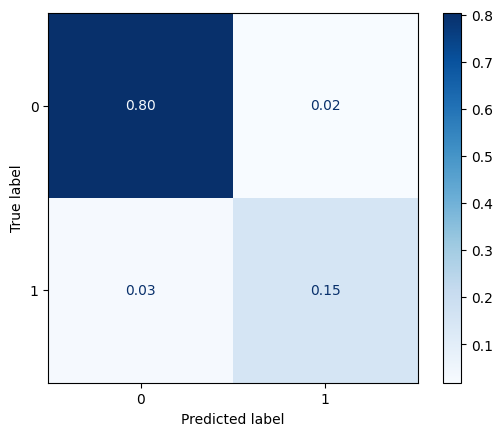

In [ ]:
# disp = ConfusionMatrixDisplay(confusion_matrix=cm_xgb,
#                               display_labels=xgb_model.classes_)
# disp.plot(cmap="Blues", values_format=".2f")

**ROC (Receiver Operating Characteristic) Curve**

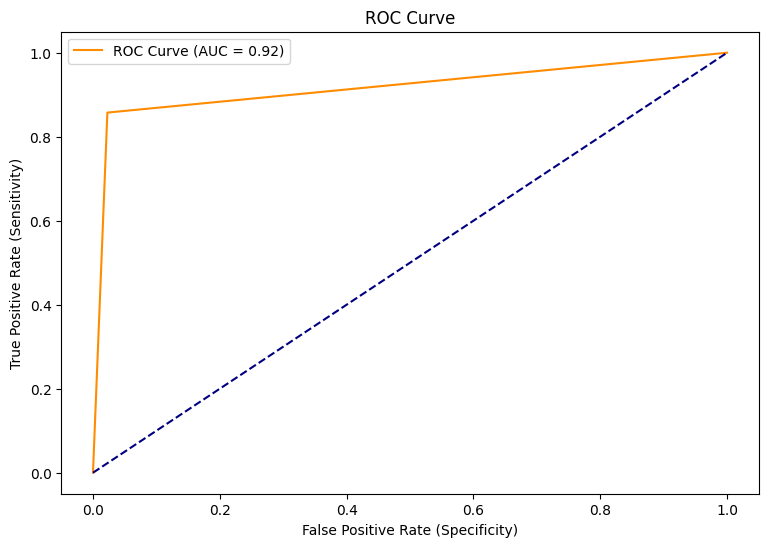

In [ ]:
# fpr, tpr, thresholds = roc_curve(y_test, y_pred)
# roc_auc = auc(fpr, tpr)

# plt.figure(figsize=(9, 6))
# plt.plot(fpr, tpr, color="darkorange", label="ROC Curve (AUC = %0.2f)" % roc_auc)
# plt.plot([0, 1], [0, 1], color="navy", linestyle="--")

# plt.title("ROC Curve")
# plt.xlabel("False Positive Rate (Specificity)")
# plt.ylabel("True Positive Rate (Sensitivity)")
# plt.legend()
# plt.show()

## Model Pipeline

### Create the Pipeline

In [ ]:
# class XGBoostModel(BaseEstimator, TransformerMixin):
#     def __init__(self):
#         self.xgboost = XGBClassifier(learning_rate=0.2,
#                                      max_depth=10,
#                                      random_state=rnd_xgb)

#     def fit(self, X, y):
#         self.xgboost.fit(X, y)
#         return self

#     def predict(self, X, y=None):
#         y_pred = self.xgboost.predict(X)
#         return y_pred

In [ ]:
# xgboost_custom = Pipeline([
#     ("custom_model", XGBoostModel())
#     ])

### Test the Pipeline

**Internal Partition**

In [ ]:
# xgboost_custom.fit(X_train, y_train)

# y_pred = xgboost_custom.predict(X_val)

In [ ]:
# print("Exactitud:    %.4f" % (accuracy_score(y_val, y_pred)))
# print("Precisión:    %.4f" % (precision_score(y_val, y_pred, average="macro")))
# print("Sensibilidad: %.4f" % (recall_score(y_val, y_pred, average="macro")))
# print("F1-score:     %.4f" % (f1_score(y_val, y_pred, average="macro")))

Exactitud:    0.9562
Precisión:    0.9292
Sensibilidad: 0.9190
F1-score:     0.9240


**External Partition**

In [ ]:
# X_train_val = pd.concat([X_train, X_val], axis=0)
# y_train_val = pd.concat([y_train, y_val], axis=0)

# xgboost_custom.fit(X_train_val, y_train_val)

# y_pred = xgboost_custom.predict(X_test)

In [ ]:
# print("Exactitud:    %.4f" % (accuracy_score(y_test, y_pred)))
# print("Precisión:    %.4f" % (precision_score(y_test, y_pred, average="macro")))
# print("Sensibilidad: %.4f" % (recall_score(y_test, y_pred, average="macro")))
# print("F1-score:     %.4f" % (f1_score(y_test, y_pred, average="macro")))

Exactitud:    0.9566
Precisión:    0.9311
Sensibilidad: 0.9185
F1-score:     0.9246


**The Best Model**

In [ ]:
# xgboost_custom.fit(X_train_val, y_train_val)

# y_pred = xgboost_custom.predict(X_test)

In [ ]:
# print("Exactitud:    %.4f" % (accuracy_score(y_test, y_pred)))
# print("Precisión:    %.4f" % (precision_score(y_test, y_pred, average="macro")))
# print("Sensibilidad: %.4f" % (recall_score(y_test, y_pred, average="macro")))
# print("F1-score:     %.4f" % (f1_score(y_test, y_pred, average="macro")))

Exactitud:    0.9566
Precisión:    0.9311
Sensibilidad: 0.9185
F1-score:     0.9246


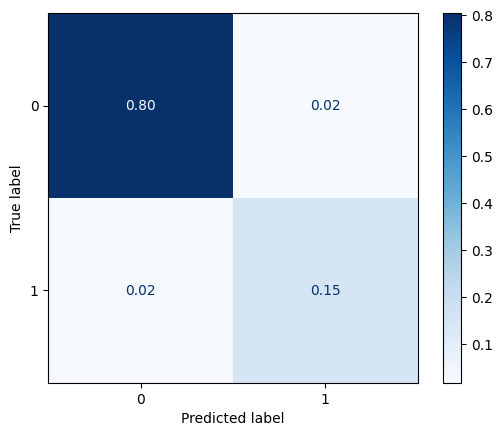

In [ ]:
# cm_xgb = confusion_matrix(y_test, y_pred, normalize="all")

# disp = ConfusionMatrixDisplay(confusion_matrix=cm_xgb,
#                               display_labels=xgb_model.classes_)
# disp.plot(cmap="Blues", values_format=".2f")

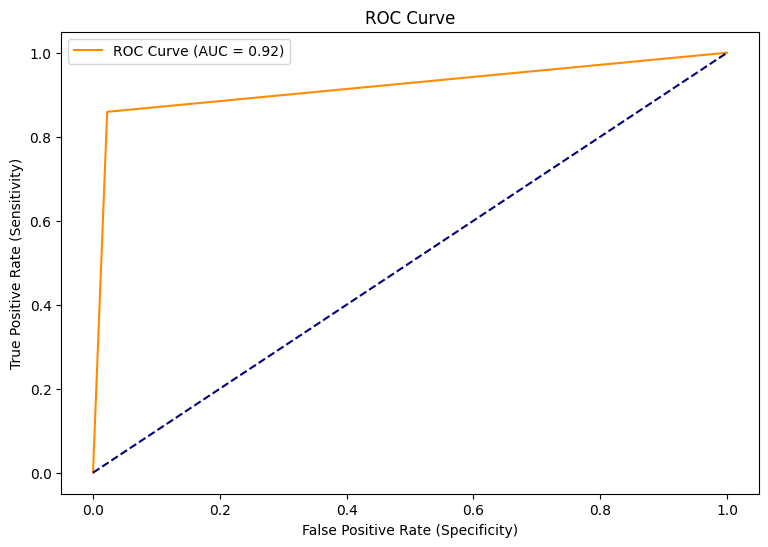

In [ ]:
# fpr, tpr, thresholds = roc_curve(y_test, y_pred)
# roc_auc = auc(fpr, tpr)

# plt.figure(figsize=(9, 6))
# plt.plot(fpr, tpr, color="darkorange", label="ROC Curve (AUC = %0.2f)" % roc_auc)
# plt.plot([0, 1], [0, 1], color="navy", linestyle="--")

# plt.title("ROC Curve")
# plt.xlabel("False Positive Rate (Specificity)")
# plt.ylabel("True Positive Rate (Sensitivity)")
# plt.legend()
# plt.show()

### Save the Model

In [ ]:
# try:
#     joblib.dump(xgboost_custom, xg_boost_model)

#     xgboost_model = joblib.load(xg_boost_model)
#     print(f"XGBoost Classifier is loaded...")

# except Exception as err:
#     print("Error:", str(err))

In [ ]:
# y_pred = xgboost_model.predict(X_test)
# df_ = pd.concat([X_test, y_test, pd.DataFrame({"Pred": y_pred})], axis=1)

In [ ]:
# df_.sample(10)